In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
!cp -r /kaggle/input/imageclassificationsport/ /kaggle/working

In [3]:
import tarfile
my_tar = tarfile.open('/kaggle/working/imageclassificationsport/data-z3.tar.xz')
my_tar.extractall('/kaggle/working/imageclassificationsport/') # specify which folder to extract to
my_tar.close()

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/working'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from os.path import basename
import glob
import os


Analyzujete početnosti v triedach, zobrazte si reprezentanta z triedy

In [6]:
class_name = {}

for filepath in glob.iglob('/kaggle/working/imageclassificationsport/train/*'):
    filename = basename(filepath)
    count = 0
    for path in os.listdir(filepath):
        # check if current path is a file
        if os.path.isfile(os.path.join(filepath, path)):
            count += 1
    class_name[filename] = [count]


In [7]:
import pandas as pd
count_df = pd.DataFrame(class_name).transpose()

In [8]:
count_df.columns = ['amount']

count_df.head()

,amount
bike polo,111
ultimate,99
volleyball,147
weightlifting,134
track bicycle,135


In [9]:
import plotly.express as px

fig = px.bar(count_df, x="amount",title="Amount of classes",template="plotly_dark", height=500)
fig.show()

Analyzujte triedy podľa farebnosti pixelov obrázkov

In [10]:
from collections import Counter
from sklearn.cluster import KMeans
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [11]:
def prep_image(raw_img):
    modified_img = cv2.resize(raw_img, (900, 600), interpolation = cv2.INTER_AREA)
    modified_img = modified_img.reshape(modified_img.shape[0]*modified_img.shape[1], 3)
    return modified_img

In [12]:
def rgb_to_hex(rgb_color):
    hex_color = "#"
    for i in rgb_color:
        i = int(i)
        hex_color += ("{:02x}".format(i))
    return hex_color

In [13]:
def color_analysis(img):
    clf = KMeans(n_clusters = 5)
    color_labels = clf.fit_predict(img)
    center_colors = clf.cluster_centers_
    counts = Counter(color_labels)
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [rgb_to_hex(ordered_colors[i]) for i in counts.keys()]
    plt.figure(figsize = (1, 1))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    plt.savefig("color_analysis_report.png")
    print(hex_colors)

['#fdfefd', '#18191b', '#4d7a93', '#c44b4e', '#abcbd7']


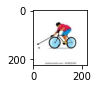

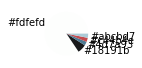

In [14]:
from matplotlib.pyplot import figure
plt.figure(figsize=(1,1))

for dirpath in glob.iglob('/kaggle/working/imageclassificationsport/train/*'):
    count = 0
    for imagepath in glob.iglob(dirpath+'/*'):
        filename = basename(imagepath)
        image = cv2.imread(imagepath)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        modified_image = prep_image(image)
        color_analysis(modified_image)
        break
    break  
            

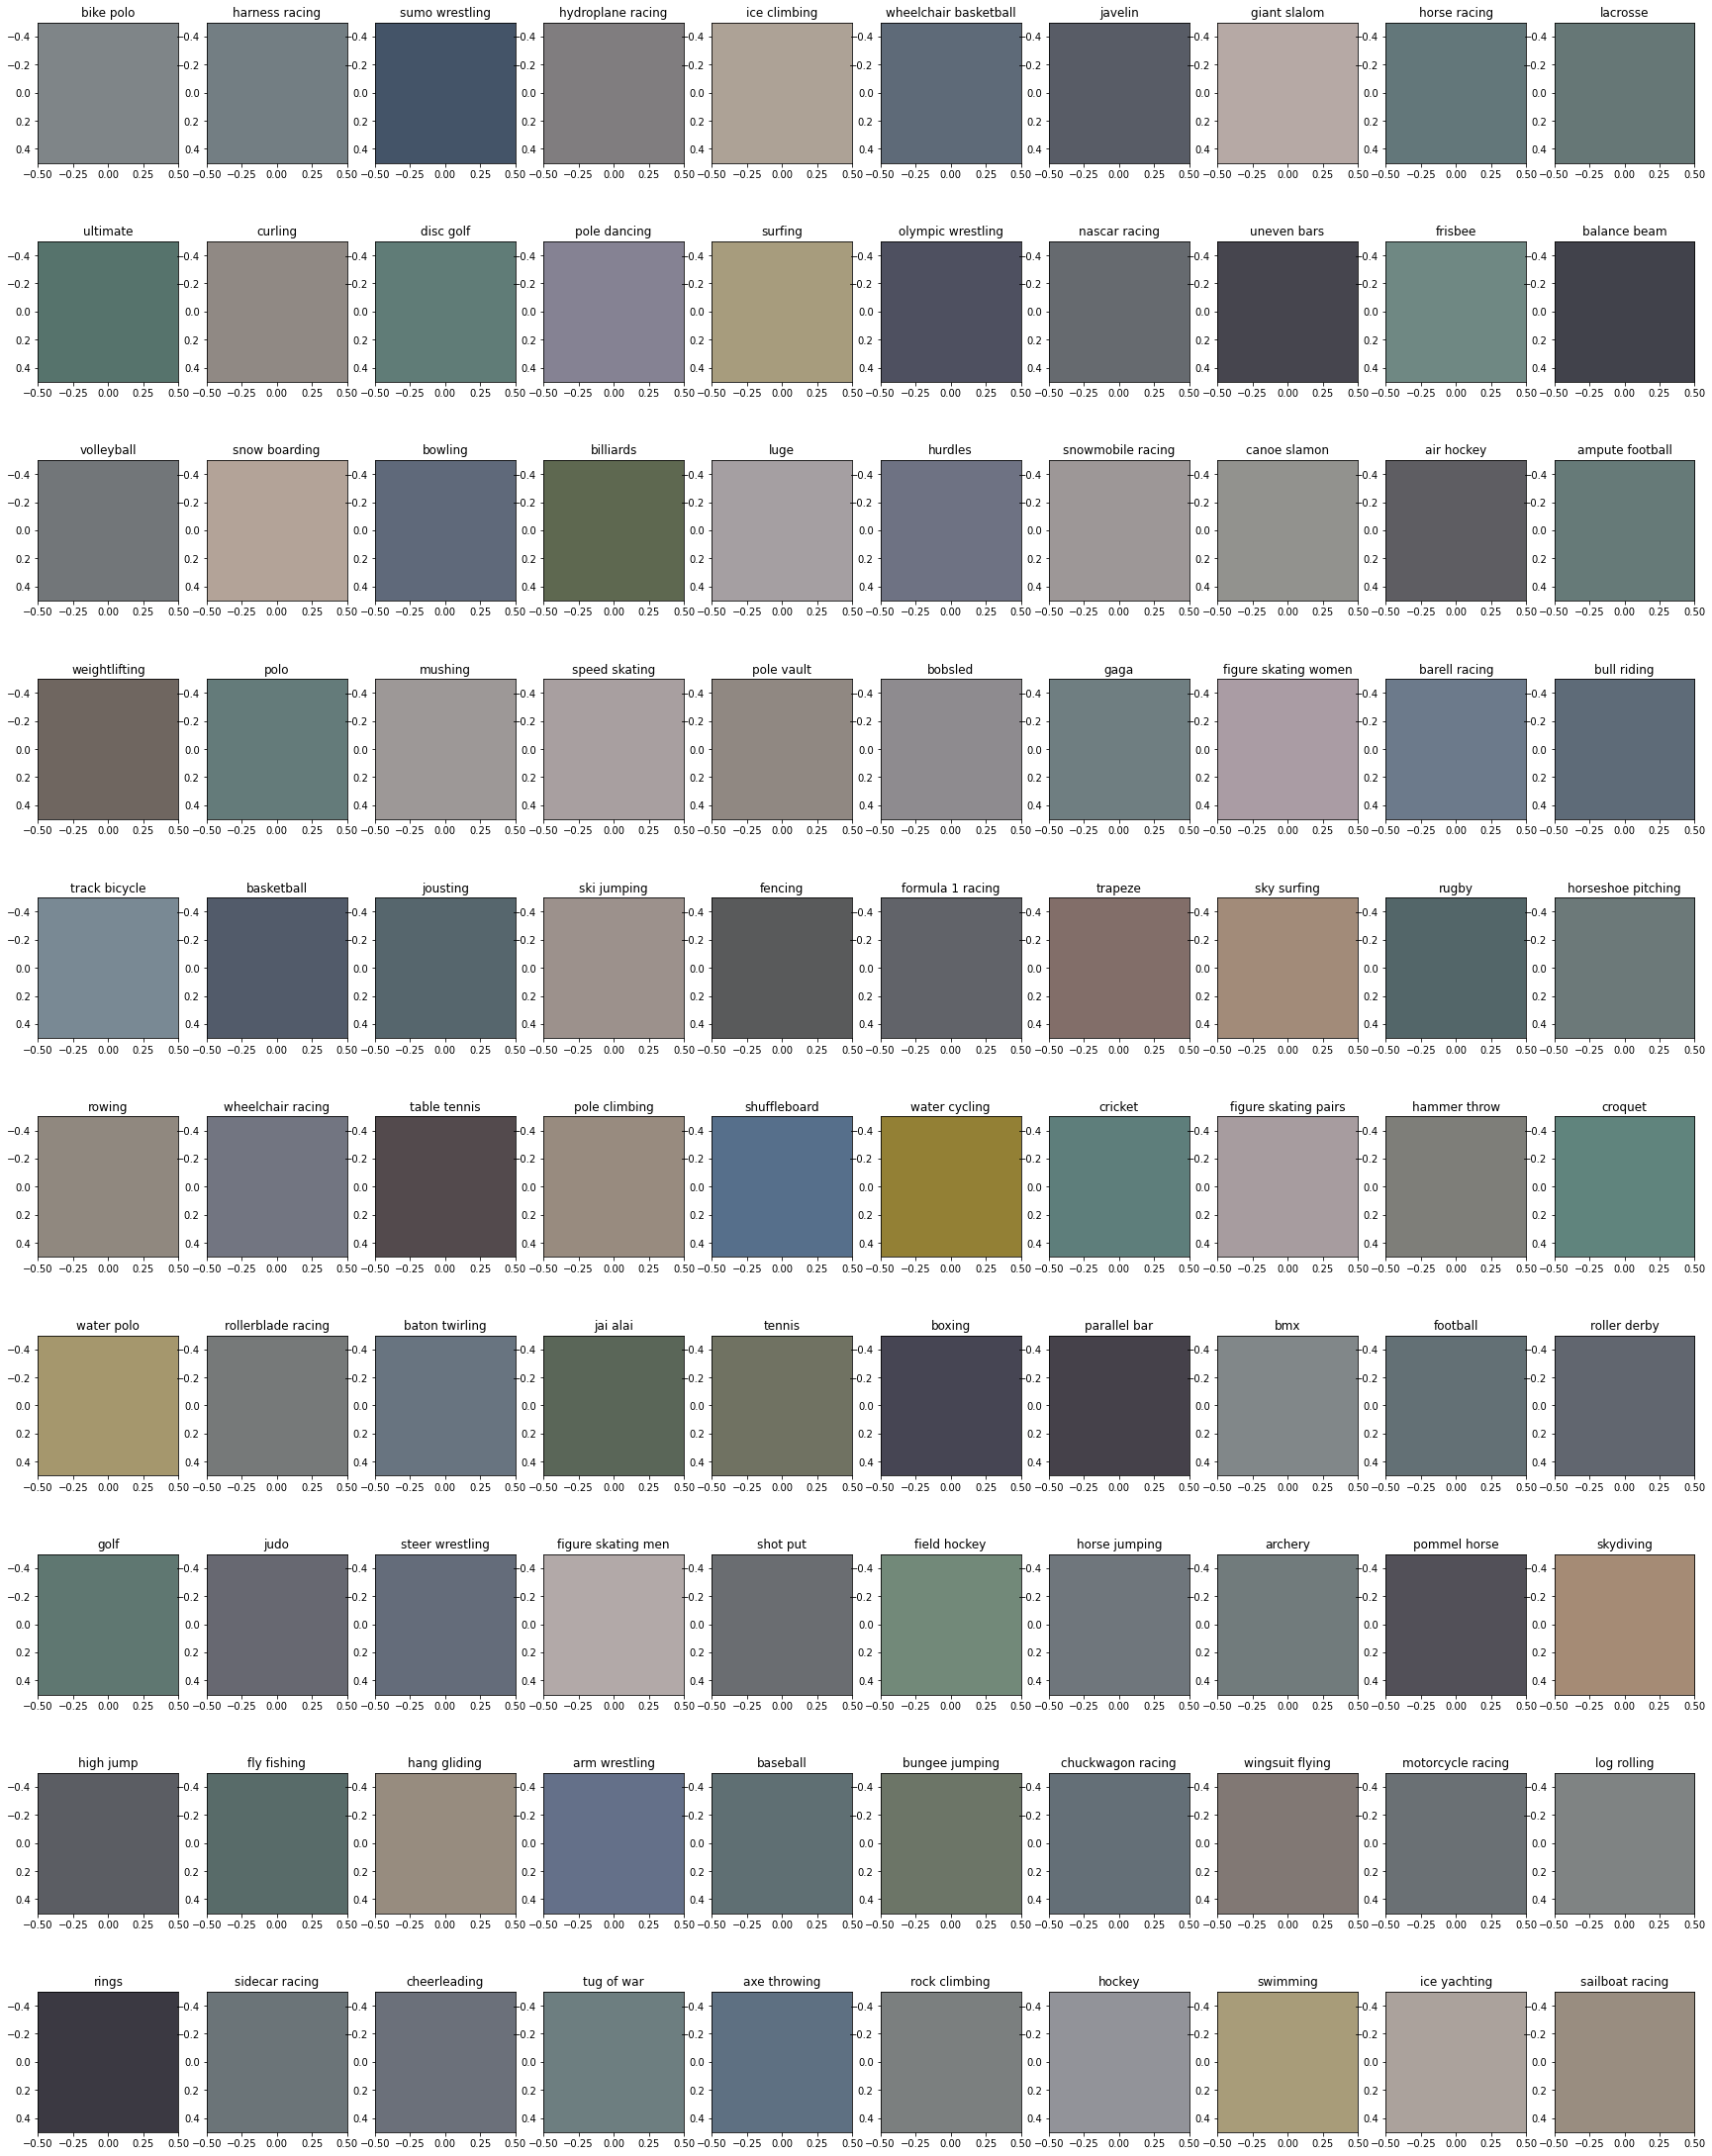

<Figure size 720x720 with 0 Axes>

In [15]:
import cv2
import numpy
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

figure, axis = plt.subplots(nrows=10, ncols=10, figsize=(30,40))
j = 0
plt.figure(figsize = (10, 10))
for (i,dirpath) in enumerate(glob.iglob('/kaggle/working/imageclassificationsport/train/*')):
    filename = basename(dirpath)
    colors = []
    for imagepath in glob.iglob(dirpath+'/*'):
        myimg = cv2.imread(imagepath)
        colors.append(myimg)    
    averageIm = np.mean(colors, axis=0)
    averageColor = averageIm.mean(axis=(0,1))
    averageColor = numpy.round(averageColor,0)
    averageColor = [int(a) for a in averageColor]
    axis[i%10,j].imshow([[averageColor]])
    axis[i%10,j].set_title(filename)
    if ((i+1)%10 == 0):
        j+=1
    

Analyzujte triedy podľa predpovedí z ľubovoľného modelu natrénovaného na
probléme ImageNet

Správne vytvorte trénovaciu, validačnú a testovaciu množinu, pripravte si generátor dát (odporúčame aj augmentovať množinu), nezabudnite dáta normalizovať a vhodne im zmeniť veľkosť

In [21]:
import cv2

isExist = os.path.exists('/kaggle/working/imageclassificationsport/compress/')
if not isExist:
    os.makedirs('/kaggle/working/imageclassificationsport/compress/')
    
for dat in glob.iglob('/kaggle/working/imageclassificationsport/*'):
    dataname = basename(dat)
    isExist = os.path.exists('/kaggle/working/imageclassificationsport/compress/'+dataname+'/')
    if not isExist:
        os.makedirs('/kaggle/working/imageclassificationsport/compress/'+dataname+'/')
    #print(dataname)
    for path in glob.iglob(dat+'/*'):
        pathname = basename(path)
        isExist = os.path.exists('/kaggle/working/imageclassificationsport/compress/'+dataname+'/'+pathname+"/")
        if not isExist:
            os.makedirs('/kaggle/working/imageclassificationsport/compress/'+dataname+'/'+pathname+"/")
        #print(pathname)
        for imgpath in glob.iglob(path+'/*'):
            love = imgpath
            imgname = basename(imgpath)
            #print(imgname)
            img = cv2.imread(imgpath, cv2.IMREAD_UNCHANGED)
            scale_percent = 20 # percent of original size
            width = int(img.shape[1] * scale_percent / 100)
            height = int(img.shape[0] * scale_percent / 100)
            dim = (width, height)
            resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
            #plt.imshow(resized)
            cv2.imwrite("/kaggle/working/imageclassificationsport/compress/"+dataname+"/"+pathname+"/"+imgname, resized)

AttributeError: 'NoneType' object has no attribute 'shape'

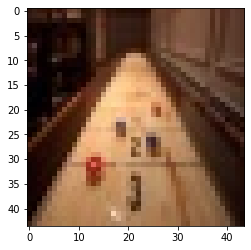

In [22]:
path = '/kaggle/working/imageclassificationsport/compress/test/shuffleboard/5.jpg'
  
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [23]:
import PIL
from PIL import Image

img = PIL.Image.open("/kaggle/working/imageclassificationsport/compress/test/shuffleboard/5.jpg")
wid, hgt = img.size
print(wid,hgt)

44 44


In [24]:
image_size = (wid, hgt)
batch_size = 64

train_ds= tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/working/imageclassificationsport/compress/train",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/working/imageclassificationsport/compress/valid",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)


test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/working/imageclassificationsport/compress/test",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 13572 files belonging to 100 classes.


2022-11-25 17:58:17.468939: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-25 17:58:17.472689: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-25 17:58:17.473435: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-25 17:58:17.476409: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Found 500 files belonging to 100 classes.
Found 500 files belonging to 100 classes.


Zobrazte si reprezentanta z triedy

2022-11-25 17:58:27.794603: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


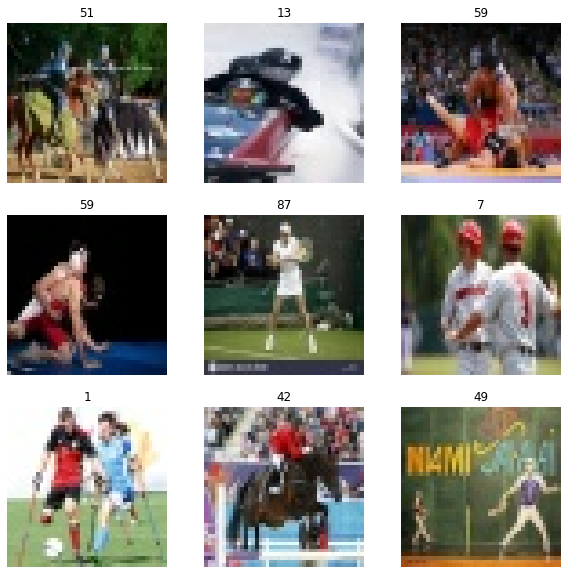

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [26]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

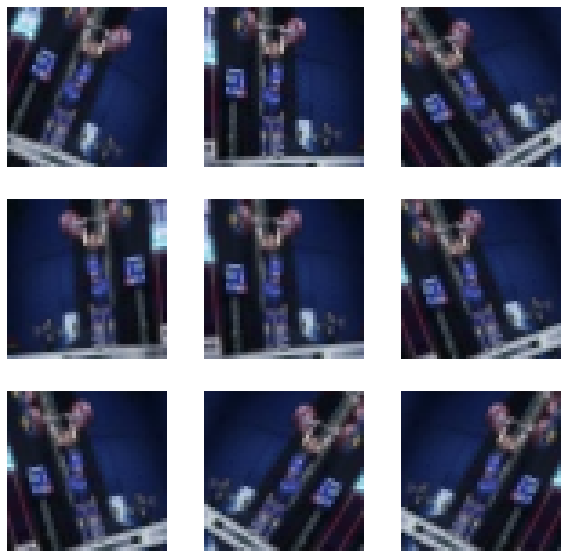

In [27]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [28]:
# Apply `data_augmentation` to the training images.
train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label),
    num_parallel_calls=tf.data.AUTOTUNE,
)
# Prefetching samples in GPU memory helps maximize GPU utilization.
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

Navrhnite sieť s aspoň 2 konvolučnými vrstvami. Ak budete sledovať pretrenovanie,
riešte ho regularizáciou. Skúste niekoľko (cielených) konfigurácii hyperparametrov, výsledky zobrazte v tabuľke. Dopracujte sa aspoň ku viditeľnej diagonálena konfúznej matici.

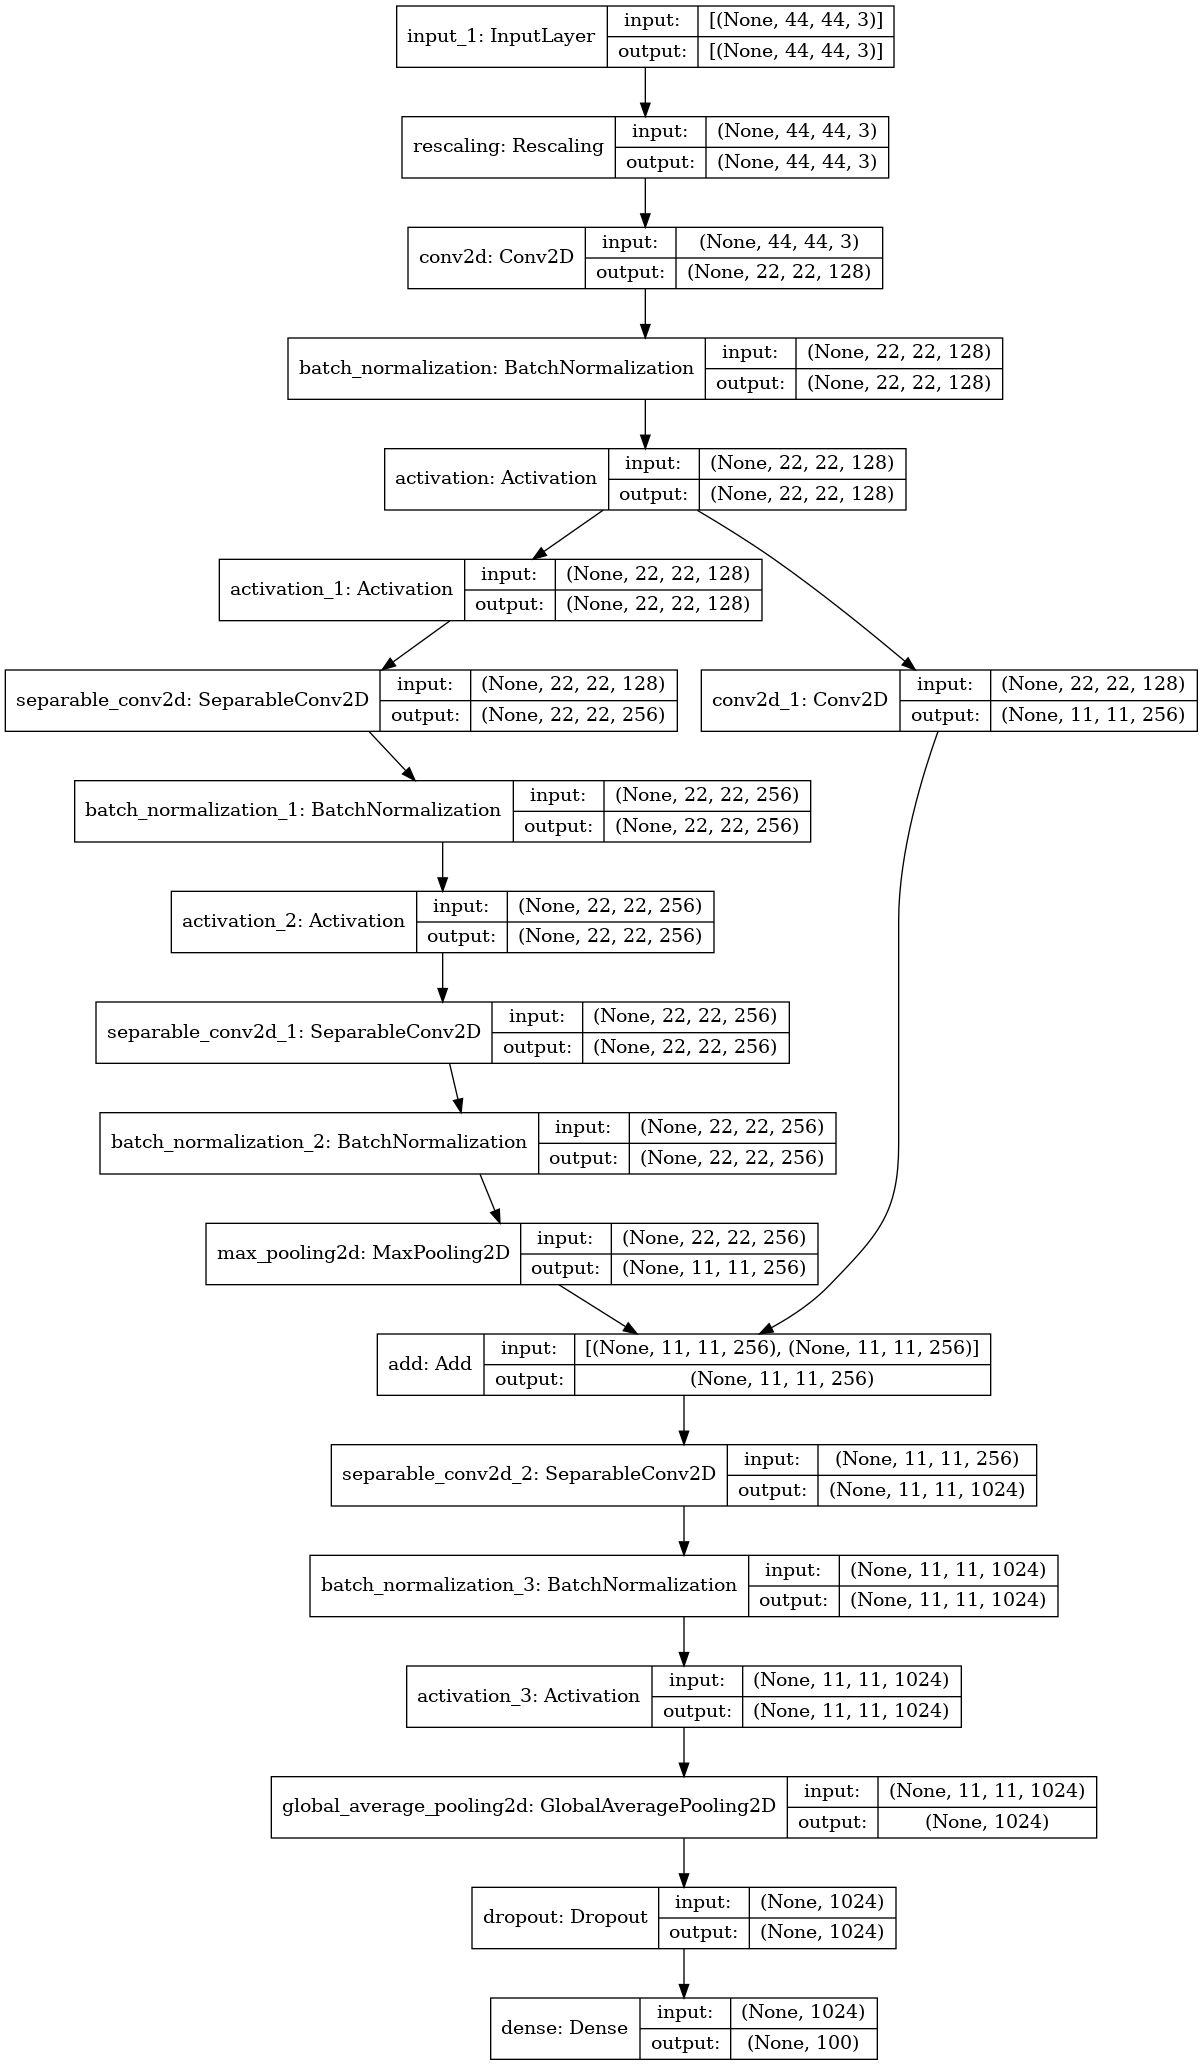

In [29]:
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)

    # Entry block
    x = layers.Rescaling(1.0 / 255)(inputs)
    x = layers.Conv2D(128, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [256]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)


model = make_model(input_shape=image_size + (3,), num_classes=100)
keras.utils.plot_model(model, show_shapes=True)

In [32]:
epochs = 50

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
     tf.keras.callbacks.TensorBoard(log_dir='/kaggle/working/logs'),
]
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)
history = model.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=val_ds,
)

2022-11-25 18:02:16.718382: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-11-25 18:02:16.718438: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-11-25 18:02:17.042234: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-11-25 18:02:17.042421: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


Epoch 1/50
  1/213 [..............................] - ETA: 2:46 - loss: 1.7398 - accuracy: 0.5156

2022-11-25 18:02:18.112998: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-11-25 18:02:18.113144: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


  3/213 [..............................] - ETA: 1:05 - loss: 1.5989 - accuracy: 0.5365

2022-11-25 18:02:18.504980: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-11-25 18:02:18.505540: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2022-11-25 18:02:18.639305: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 221 callback api events and 218 activity events. 
2022-11-25 18:02:18.646420: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-11-25 18:02:18.658835: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: /kaggle/working/logs/train/plugins/profile/2022_11_25_18_02_18

2022-11-25 18:02:18.667894: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to /kaggle/working/logs/train/plugins/profile/2022_11_25_18_02_18/c87bf5f1445b.trace.json.gz
2022-11-25 18:02:18.680125: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Cre

213/213 [==============================] - 6s 26ms/step - loss: 1.6057 - accuracy: 0.5545 - val_loss: 2.2813 - val_accuracy: 0.4260
Epoch 2/50
213/213 [==============================] - 5s 23ms/step - loss: 1.5668 - accuracy: 0.5682 - val_loss: 2.2078 - val_accuracy: 0.4680
Epoch 3/50
213/213 [==============================] - 6s 27ms/step - loss: 1.5490 - accuracy: 0.5713 - val_loss: 2.8639 - val_accuracy: 0.3740
Epoch 4/50
213/213 [==============================] - 5s 25ms/step - loss: 1.4975 - accuracy: 0.5861 - val_loss: 2.2752 - val_accuracy: 0.4600
Epoch 5/50
213/213 [==============================] - 5s 23ms/step - loss: 1.4981 - accuracy: 0.5782 - val_loss: 1.8678 - val_accuracy: 0.5120
Epoch 6/50
213/213 [==============================] - 5s 22ms/step - loss: 1.4712 - accuracy: 0.5947 - val_loss: 1.9609 - val_accuracy: 0.5000
Epoch 7/50
213/213 [==============================] - 6s 27ms/step - loss: 1.4359 - accuracy: 0.6004 - val_loss: 1.9277 - val_accuracy: 0.5140
Epoch 8/50

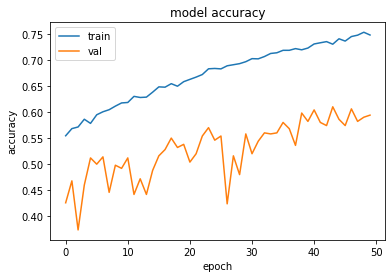

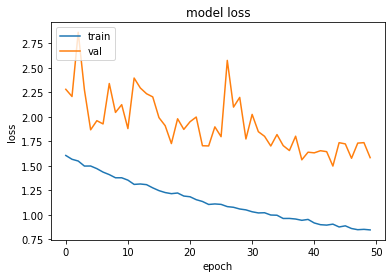

In [33]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()